# HW 1 Starter Code for 2026

For HW1 Instructions see:

<https://www.cs.tufts.edu/cs/145/2026s/hw1.html>

# Imports

In [ ]:
import numpy as np
import pandas as pd

import scipy.stats
from scipy.stats import multivariate_normal
from scipy.special import kv as scipy_bessel_func
from scipy.special import gamma as scipy_gamma_func

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set('notebook', font_scale=1.5, style='whitegrid')

# Problem 1: Sample from GP prior

## Write code to sample f values from prior

In [ ]:
def draw_sample_of_f_from_GP_prior_at_x_grid(
        x_grid_G, mean_func, cov_func,
        kernel_kwargs={},
        random_seed=42,
        n_samples=1):
    """ Draw sample from GP prior given mean/cov functions

    Args
    ----
    x_grid_G : 1D array, size n_grid_pts (G)
        Contains G specific x_i values to evaluate function at
    mean_func : function, maps (1D arr size A) to (1D arr size A)
        Computes mean value $m(x_i)$ at each input x_i value 
    cov_func : function, maps (1D arr size A, 1D arr size B) to (2D AxB)
        Computes covariance (kernel) value at each pair of inputs.
    kernel_kwargs : dict
        Each key,val pair provides the name and float value of
        the named hyperparameter for kernel function
    random_seed : int
        See for the random number generator
    n_samples : int
        Number of samples to draw from the prior    

    Returns
    -------
    f_SG : 2D array, n_samples (S) x n_grid_pts (G)
        Contains sampled function values at each point of x_grid
    """
    S = int(n_samples)
    G = x_grid_G.size
    mean_G = np.ones(G) # TODO FIXME
    cov_GG = np.eye(G)  # TODO FIXME
    assert cov_GG.shape == (G,G)
    
    # Use consistent random number generator for reproducibility
    prng = np.random.RandomState(int(random_seed))
    f_SG = np.arange(S).reshape((S,1)) * np.ones((S, G)) # TODO FIX use prng.multivariate_normal(...)
    return f_SG

In [ ]:
def plot_f_samples_at_x_grid(x_grid_G, f_grid_SG,
                             color=None, axis_handle=None):
    if axis_handle is None:
        axis_handle = pylab.gca() # get current axis handle if not provided
    S, G = f_grid_SG.shape
    for s in range(S):
        axis_handle.plot(x_grid_G, f_grid_SG[s], '-', color=color)

### Define mean_func

In [ ]:
def mean_func(x_grid_G):
    return np.zeros_like(x_grid_G)

### Define sqexp kernel

In [ ]:
def sqexp_kernel_func(x_grid_A, x_grid_B=None, **kernel_kwargs):
    ''' Compute squared exponential kernel between two provided arrays
    
    Args
    ----
    x_A : 1D array, shape (A,)
        Contains univariate x value for each of A observations
    x_B : 1D array, shape (B,)
        Contains univariate x value for each of B observations
    kernel_kwargs : dict
        Contains length scale value under key 'L'
    
    Returns
    -------
    k_AB : 2D array, shape (A,B)
        Kernel matrix where k_AB[aa, bb]
        gives the kernel value between x_grid_A[aa], x_grid_B[bb]
    '''
    # Handy code to reshape provided 1D arrays into 2D for efficient vector ops
    if x_grid_B is None:
        x_grid_B = x_grid_A.copy()
    A = x_grid_A.shape[0]
    B = x_grid_B.shape[0]
    xa_A1 = np.reshape(x_grid_A, (A, 1))
    xb_1B = np.reshape(x_grid_B, (1, B))
    
    # Pull desired lengthscale value out of dict
    L = kernel_kwargs['L']
    
    # TODO fixme
    return np.ones((A,B))

### Define Matern kernel

In [ ]:
def matern_kernel_func(x_grid_A, x_grid_B=None, **kernel_kwargs):
    ''' Compute Matern kernel between two provided arrays
    
    Args
    ----
    x_A : 1D array, shape (A,)
        Contains univariate x value for each of A observations
    x_B : 1D array, shape (B,)
        Contains univariate x value for each of B observations
    kernel_kwargs : dict
        Contains length scale value under key 'L'
        Contains smoothness value under key 'nu'
    
    Returns
    -------
    k_AB : 2D array, shape (A,B)
        Kernel matrix where k_AB[aa, bb]
        gives the kernel value between x_grid_A[aa], x_grid_B[bb]
    '''
    # Handy code to reshape provided 1D arrays into 2D for efficient vector ops
    if x_grid_B is None:
        x_grid_B = x_grid_A.copy()
    A = x_grid_A.shape[0]
    B = x_grid_B.shape[0]
    xa_A1 = np.reshape(x_grid_A, (A, 1))
    xb_1B = np.reshape(x_grid_B, (1, B))
    
    # Pull desired lengthscale value out of dict
    L = kernel_kwargs['L']
    nu = kernel_kwargs['nu']
    
    # TODO fixme
    return np.ones((A,B))

### Setup plot appearance properties

In [ ]:
H = 4 # Panel height
W = 6 # Panel width

S = 3  # num samples to draw from posterior

G = 501  # num grid points to use
x_grid_G = np.linspace(-6, 6, G)

## 1a: Plots of samples with Squared Exponential Kernel

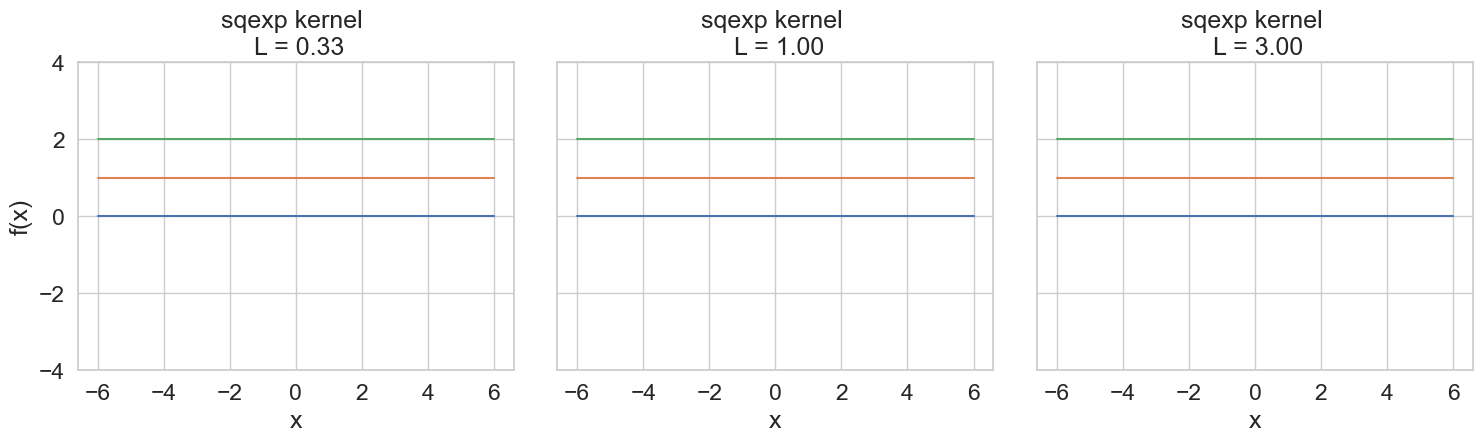

In [ ]:
ell_list = [0.33, 1.0, 3.0]
ncols = len(ell_list)
nrows = 1

fig_h, axes_list = plt.subplots(
    nrows=nrows, ncols=ncols,
    sharex=True, sharey=True,
    figsize=(W*ncols, H*nrows))
for ii, L in enumerate(ell_list):
    cur_ax_h = axes_list[ii]
    
    f_grid_SG = draw_sample_of_f_from_GP_prior_at_x_grid(
        x_grid_G, mean_func, sqexp_kernel_func,
        kernel_kwargs=dict(L=L), n_samples=S)
    assert f_grid_SG.shape == (S, G)
    
    plot_f_samples_at_x_grid(
        x_grid_G,
        f_grid_SG,
        axis_handle=cur_ax_h,
        )
    cur_ax_h.set_title('sqexp kernel \n L = %.2f' % L)
    cur_ax_h.set_yticks([-4, -2, 0, 2, 4]);
    cur_ax_h.set_xticks([-6, -4, -2, 0, 2, 4, 6]);
    cur_ax_h.set_xlabel('x');
    if ii == 0: cur_ax_h.set_ylabel('f(x)');
    
plt.subplots_adjust(hspace=0.3, wspace=0.1)

TODO export the above figure and insert into your report

## Part 1b: Short answer interpreting SqExp Plots

TODO see instructions on website, and put answer in your report

## Part 1c: Plots of samples with Matern Kernel

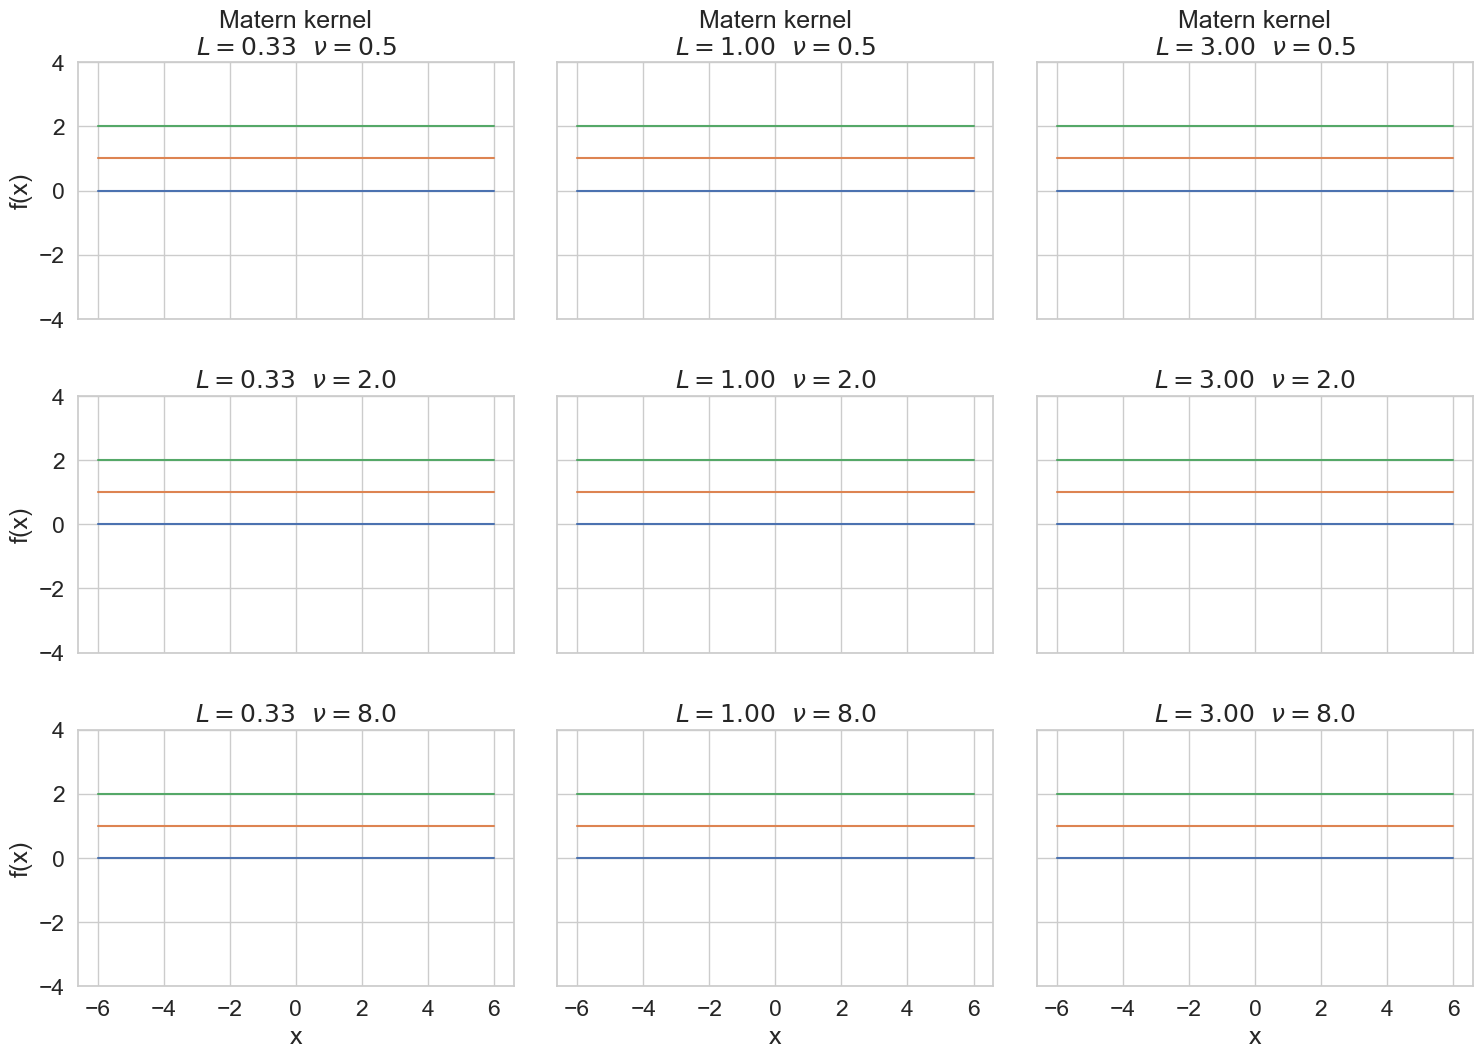

In [ ]:
ell_list = [0.33, 1.0, 3.0]
ncols = len(ell_list)

nu_list = [0.5, 2.0, 8.0]
nrows = len(nu_list)

fig_h, axes_grid_RC = plt.subplots(
    nrows=nrows, ncols=ncols,
    sharex=True, sharey=True,
    figsize=(W*ncols, H*nrows))
for cc, L in enumerate(ell_list):
    for rr, nu in enumerate(nu_list):
        cur_ax_h = axes_grid_RC[rr,cc]

        f_grid_SG = draw_sample_of_f_from_GP_prior_at_x_grid(
            x_grid_G, mean_func, matern_kernel_func,
            kernel_kwargs=dict(L=L, nu=nu),
            n_samples=S)
        assert f_grid_SG.shape == (S, G)
        
        plot_f_samples_at_x_grid(
            x_grid_G,
            f_grid_SG,
            axis_handle=cur_ax_h
            )
        
        # Make plot look pretty. Please don't edit without good reasons.
        title_str = r'$L{=}%.2f~~\nu{=}%.1f$' % (L,nu)
        if rr == 0:
            title_str = 'Matern kernel\n' + title_str
        cur_ax_h.set_title(title_str)
        cur_ax_h.set_yticks([-4, -2, 0, 2, 4]);
        cur_ax_h.set_xticks([-6, -4, -2, 0, 2, 4, 6]);

        if rr == len(nu_list) - 1: cur_ax_h.set_xlabel('x');
        if cc == 0: cur_ax_h.set_ylabel('f(x)');
            
plt.subplots_adjust(hspace=0.3, wspace=0.1)

## Part 1d: Short answer interpreting Matern plots

TODO see instructions on website, and put answer in your report

# Problem 2: Sampling from GP posterior given data

## Implementing the posterior

In [ ]:
def calc_posterior_params__mean_G_and_cov_GG(
        x_train_N,
        y_train_N,
        x_test_G,
        mean_func=None,
        cov_func=None,
        tau=0.1,
        **kernel_kwargs):
    """ Compute parameters of Gaussian posterior over function value at G provided inputs
    
    Args
    ----
    x_train_N : 1D array, size n_train_pts (N)
    y_train_N : 1D array, size n_train_pts (N)
    x_grid_G : 1D array, size n_grid_pts (G)
    
    Returns
    -------
    mean_G : 1D array, size G
        Posterior mean vector
    cov_GG : 2D array, size G x G
        Posterior covariance matrix
    
    References
    ----------
    Alg. 2.1 of GPML book by Rasmussen and Williams
    http://www.gaussianprocess.org/gpml/chapters/RW2.pdf#page=13
    """
    N = x_train_N.shape[0]
    G = x_test_G.shape[0]

    mean_G = np.ones(G) # TODO fixme
    cov_GG = np.eye(G) # TODO fixme
    
    return mean_G, cov_GG

In [ ]:
def draw_sample_of_f_from_GP_posterior_at_x_grid(
        x_train_N, y_train_N,
        x_grid_G, mean_func, cov_func,
        kernel_kwargs={},
        tau=0.1,
        random_seed=42,
        n_samples=1):
    """ Draw sample from GP posterior given data and mean/cov functions

    Args
    ----
    x_train_N : 1D array, size n_train_pts (N)
        Contains observed inputs of each of the N training points
    y_train_N : 1D array, size n_train_pts (N)
        Contains observed outputs of each of the N training points
    x_grid_G : 1D array, size n_grid_pts (G)
        Contains G specific x_i values to evaluate function at
    mean_func : function, maps (1D arr size A) to (1D arr size A)
        Computes mean value $m(x_i)$ at each input x_i value 
    cov_func : function, maps (1D arr size A, 1D arr size B) to (2D AxB)
        Computes covariance (kernel) value at each pair of inputs.
    tau : scalar float
        Standard deviation of the likelihood of observations y given f
    random_seed : int
        Seed for the random number generator
    n_samples : int
        Number of samples to draw from the prior

    Returns
    -------
    f_SG : 2D array, n_samples (S) x n_grid_pts (G)
        Contains sampled function values at each point of x_grid
    """
    S = int(n_samples)
    mean_G, cov_GG = calc_posterior_params__mean_G_and_cov_GG(
        x_train_N, y_train_N, x_grid_G, mean_func, cov_func, tau, **kernel_kwargs)

    prng = np.random.RandomState(int(random_seed))
    f_SG = np.arange(S).reshape((S,1)) * np.ones((S, G)) # TODO FIX use prng.multivariate_normal(...)
    return f_SG

## Load training data

In [ ]:
train_csv_df = pd.read_csv('avg_deaths_per_day_in_middlesex_ma_2021__train.csv')

In [ ]:
x_train_N = np.asarray(train_csv_df['days_since_211207'].values, dtype=np.float64)
y_train_N = np.asarray(train_csv_df['deaths_avg'].values, dtype=np.float64)

N = y_train_N.size

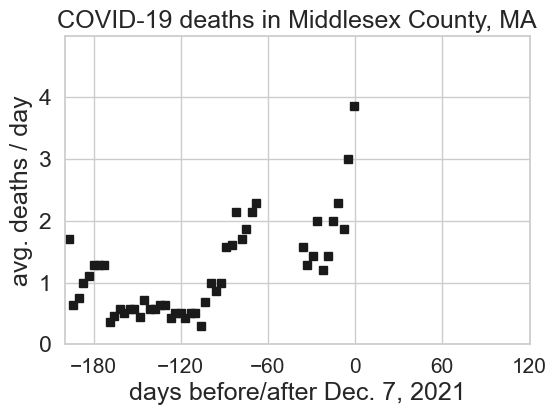

In [ ]:
plt.subplots(nrows=1,ncols=1,figsize=(W,H));
plt.plot(x_train_N, y_train_N, 'ks');
plt.ylim([0, 4.99]);
plt.xlim([-200, 100]);
plt.xticks(np.arange(-180, 91, 30), fontsize=15);
plt.gca().set_xticks(np.arange(-180, 121, 60));
plt.xlabel('days before/after Dec. 7, 2021');
plt.ylabel('avg. deaths / day');
plt.title('COVID-19 deaths in Middlesex County, MA');

## Problem 2a: Plots of posterior samples with SqExp kernel

We'll draw a vertical red line at $x'=20$, which a few later questions ask about.

In [ ]:
G = 501
x_grid_G = np.linspace(-200, 150, G)

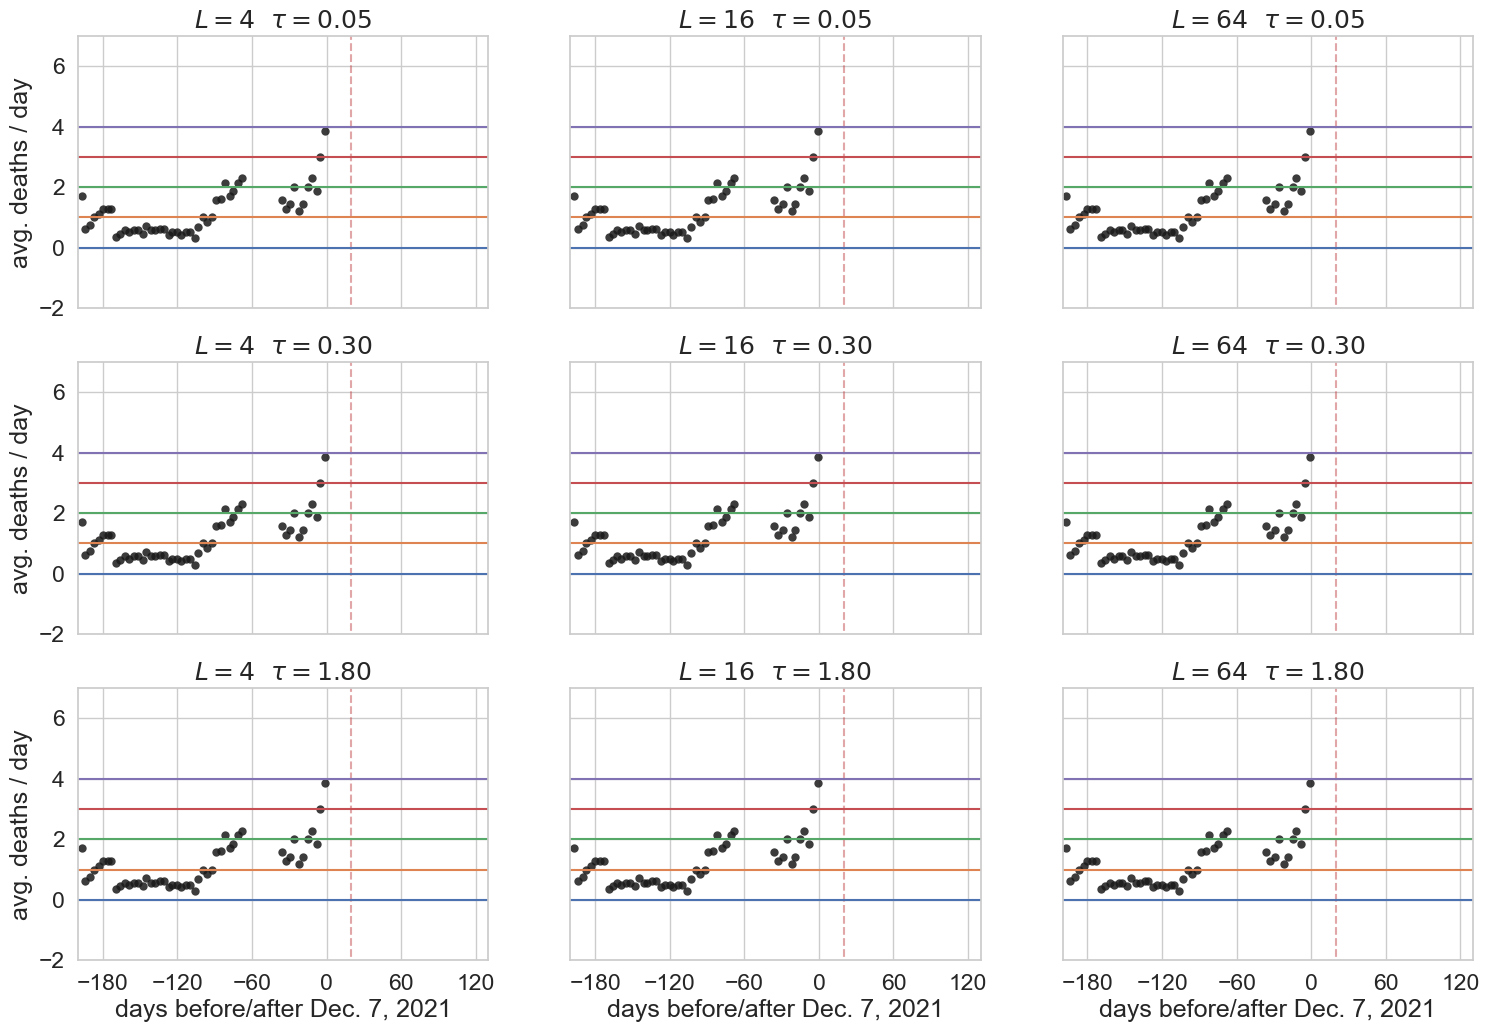

In [ ]:
n_samples = 5

ell_list = [4.0, 16.0, 64.]
ncols = len(ell_list)

tau_list = [0.05, 0.3, 1.8]
nrows = len(tau_list)

fig_h, ax_grid_RC = plt.subplots(
    nrows=nrows, ncols=ncols, sharex=True, sharey=True,
    figsize=(ncols*W,nrows*H))
for cc, L in enumerate(ell_list):
    for rr, tau in enumerate(tau_list):
        f_grid_SG = draw_sample_of_f_from_GP_posterior_at_x_grid(
            x_train_N, y_train_N,
            x_grid_G,
            mean_func, sqexp_kernel_func,
            tau=tau,
            kernel_kwargs=dict(L=L),
            n_samples=n_samples)
        
        # Show the training data as dark (but not too dark) dots
        cur_ax_h = ax_grid_RC[rr,cc]
        cur_ax_h.plot(
            x_train_N, y_train_N, 'k.',
            markersize=12, mew=0, alpha=0.85)
        
        # Show a vertical line at x=+20, which we'll ask about later
        x_20_H = [20, 20]
        y_20_H = [-3, 10]
        cur_ax_h.plot(
            x_20_H, y_20_H, 'r--', alpha=0.5)
        
        # Show the samples from the posterior
        plot_f_samples_at_x_grid(
            x_grid_G,
            f_grid_SG,
            axis_handle=cur_ax_h
            )
        
        title_str = r'$L{=}%.0f~~\tau{=}%.2f$' % (L, tau)
        cur_ax_h.set_title(title_str)
        
        # Make the plot look pretty. Please don't adjust!
        cur_ax_h.set_ylim([-2, 6.99]);
        cur_ax_h.set_xlim([-200, 130]);
        cur_ax_h.set_xticks(np.arange(-180, 121, 60));
        if rr == 2:
            cur_ax_h.set_xlabel('days before/after Dec. 7, 2021');
        if cc == 0:
            cur_ax_h.set_ylabel('avg. deaths / day');

## Problems 2b, 2c, 2d, 2e, 2f

TODO see website instructions and answer in your report